In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip time-series-attribution-master.zip
!mv time-series-attribution-master time-series-attribution

In [19]:
layers = ['0','-1','-2','-3']
captum_methods = ["Saliency", "IntegratedGradients", "InputXGradient", "GuidedBackprop", "LayerGradCam", "GuidedGradCam", "Lime"]
yiskw713_methods = ["GradCAMpp", "SmoothGradCAMpp", "ScoreCAM", "RISE"]
methods = captum_methods + yiskw713_methods

In [21]:
with open("/content/time-series-attribution/results/randomization_results.json", 'r') as myfile:
      data=myfile.read()
accs = json.loads(data)

dataset = "CharacterTrajectories"
accs = accs[dataset]

### Plot spearman correlation coefficients

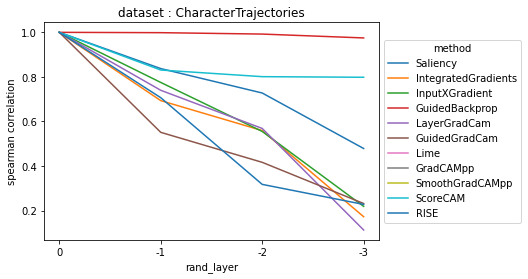

In [42]:
fig, axs = plt.subplots()

for method in methods:
  corr = []
  for layer in layers:
    corr.append(accs[layer][method]["spearmanCorr"][method])
  axs.plot(range(len(layers)), corr, label=method)

axs.set_ylabel("spearman correlation")
axs.set_xlabel("rand_layer")
axs.set_xticks(range(len(layers)))
axs.set_xticklabels(layers)
plot_title = "dataset : " + dataset
axs.set_title(plot_title)
axs.legend(title="method",loc='center left', bbox_to_anchor= (1.0, 0.5))
plt.show()

### Generate correlation matrix

In [24]:
methods1 = methods.copy()

# remove methods that results in NaNs
methods1.remove("GradCAMpp")
methods1.remove("SmoothGradCAMpp")

corrs = {}
for method in methods1:
  corrs[method] = accs['0'][method]["spearmanCorr"].copy()
  del corrs[method]["GradCAMpp"]
  del corrs[method]["SmoothGradCAMpp"]
  

corrs = pd.DataFrame(corrs)
print(corrs)

                     Saliency  IntegratedGradients  ...  ScoreCAM      RISE
Saliency             1.000000             0.274956  ...  0.455186  0.545520
IntegratedGradients  0.274956             1.000000  ...  0.318551  0.333918
InputXGradient       0.223512             0.761773  ...  0.194763  0.235103
GuidedBackprop       0.046155            -0.032785  ... -0.059178 -0.008446
LayerGradCam         0.142590             0.090351  ...  0.422879  0.243574
GuidedGradCam       -0.020514            -0.052701  ... -0.044381 -0.032742
Lime                 0.001653             0.000697  ...  0.000891  0.002023
ScoreCAM             0.455186             0.318551  ...  1.000000  0.641943
RISE                 0.545520             0.333918  ...  0.641943  1.000000

[9 rows x 9 columns]


In [8]:
corr = corrs.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Saliency,IntegratedGradients,InputXGradient,GuidedBackprop,LayerGradCam,GuidedGradCam,Lime,ScoreCAM,RISE
Saliency,1.000,0.271,0.169,-0.353,0.117,-0.455,-0.335,0.630,0.752
IntegratedGradients,0.271,1.000,0.937,-0.456,-0.076,-0.490,-0.305,0.281,0.333
InputXGradient,0.169,0.937,1.000,-0.373,-0.176,-0.407,-0.272,0.112,0.184
GuidedBackprop,-0.353,-0.456,-0.373,1.000,-0.458,0.539,-0.143,-0.563,-0.482
LayerGradCam,0.117,-0.076,-0.176,-0.458,1.000,-0.399,-0.224,0.547,0.300
GuidedGradCam,-0.455,-0.490,-0.407,0.539,-0.399,1.000,-0.132,-0.549,-0.521
Lime,-0.335,-0.305,-0.272,-0.143,-0.224,-0.132,1.000,-0.346,-0.352
ScoreCAM,0.630,0.281,0.112,-0.563,0.547,-0.549,-0.346,1.000,0.846
RISE,0.752,0.333,0.184,-0.482,0.300,-0.521,-0.352,0.846,1.000
